In [1]:
import numpy as np
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/creditcardfraud/creditcard.csv


In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:

# Load data
data = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')  # Adjust path if necessary


In [37]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [39]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [40]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [41]:
data['Class'].value_counts(normalize=True) * 100

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64

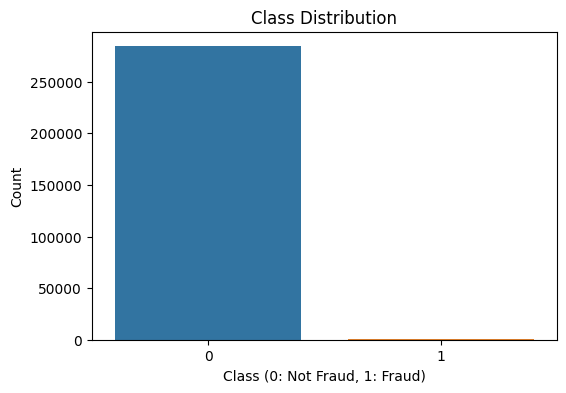

In [42]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=data)
plt.title("Class Distribution")
plt.xlabel("Class (0: Not Fraud, 1: Fraud)")
plt.ylabel("Count")
plt.show()

In [43]:
# Here classs distribution is highly imbalanced therefore we use smote technique to balance the data

# **SMOTE**

Here class distribution is highly imbalanced therefore we use smote technique to balance the data

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


In [45]:
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))


In [46]:

X = data.drop(columns=['Class'])
y = data['Class']


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [48]:

print("Class Distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts(normalize=True))


Class Distribution after SMOTE:
Class
0    0.5
1    0.5
Name: proportion, dtype: float64


In [49]:
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=['Class'])
smote_data = pd.concat([X_resampled_df, y_resampled_df], axis=1)


In [50]:
smote_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,143352.0,1.955041,-0.380783,-0.315013,0.330155,-0.509374,-0.086197,-0.627978,0.035994,1.054560,...,0.238197,0.968305,0.053208,-0.278602,-0.044999,-0.216780,0.045168,-0.047145,-0.313289,0
1,117173.0,-0.400975,-0.626943,1.555339,-2.017772,-0.107769,0.168310,0.017959,-0.401619,0.040378,...,-0.153485,0.421703,0.113442,-1.004095,-1.176695,0.361924,-0.370469,-0.144792,-0.169717,0
2,149565.0,0.072509,0.820566,-0.561351,-0.709897,1.080399,-0.359429,0.787858,0.117276,-0.131275,...,-0.314638,-0.872959,0.083391,0.148178,-0.431459,0.119690,0.206395,0.070288,-0.305292,0
3,93670.0,-0.535045,1.014587,1.750679,2.769390,0.500089,1.002270,0.847902,-0.081323,0.371579,...,0.063525,0.443431,-0.072754,0.448192,-0.655203,-0.181038,-0.093013,-0.064931,0.116306,0
4,82655.0,-4.026938,1.897371,-0.429786,-0.029571,-0.855751,-0.480406,-0.435632,1.313760,0.536044,...,-0.480691,-0.230369,0.250717,0.066399,0.470787,0.245335,0.286904,-0.322672,-0.250239,0


In [51]:
smote_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,454902.000000,454902.000000,454902.000000,454902.000000,454902.000000,454902.000000,454902.000000,454902.000000,454902.000000,454902.000000,...,454902.000000,454902.000000,454902.000000,454902.000000,454902.000000,454902.000000,454902.000000,454902.000000,454902.000000,454902.000000
mean,87269.836239,-2.261150,1.810410,-3.485815,2.303402,-1.538990,-0.718855,-2.751608,0.372215,-1.300049,...,0.392057,0.001859,-0.043456,-0.049582,0.010660,0.033123,0.097478,0.045774,0.047636,0.500000
std,48346.086808,5.071460,3.380100,5.821980,3.101994,3.912953,1.637415,5.324900,4.262745,2.173750,...,2.389878,1.031354,1.089382,0.540323,0.628398,0.447776,0.910784,0.406929,0.909579,0.500001
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.320155,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-9.895244,-15.430084,-0.353229,0.000000
25%,44705.201481,-2.869794,-0.091333,-5.259242,-0.064771,-1.813451,-1.525987,-3.161419,-0.192421,-2.291110,...,-0.149332,-0.495302,-0.224393,-0.383812,-0.312585,-0.267272,-0.063201,-0.057708,-0.336803,0.000000
50%,80415.000000,-0.793104,1.023221,-1.545347,1.475518,-0.431509,-0.685755,-0.758670,0.170494,-0.786636,...,0.167239,0.024858,-0.028518,-0.001385,0.042873,0.002515,0.062488,0.035492,-0.241963,0.500000
75%,134033.927761,0.832857,2.912743,0.270957,4.445146,0.425356,0.010407,0.182147,0.840365,0.081648,...,0.648486,0.528181,0.180963,0.349089,0.364659,0.315090,0.428565,0.204821,0.046539,1.000000
max,172792.000000,2.454930,22.057729,4.187811,16.875344,34.801666,73.301626,120.589494,20.007208,10.392889,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,102.362243,1.000000


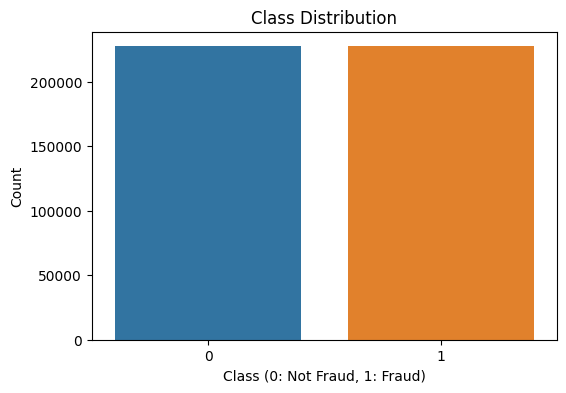

In [52]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=smote_data)
plt.title("Class Distribution")
plt.xlabel("Class (0: Not Fraud, 1: Fraud)")
plt.ylabel("Count")
plt.show()

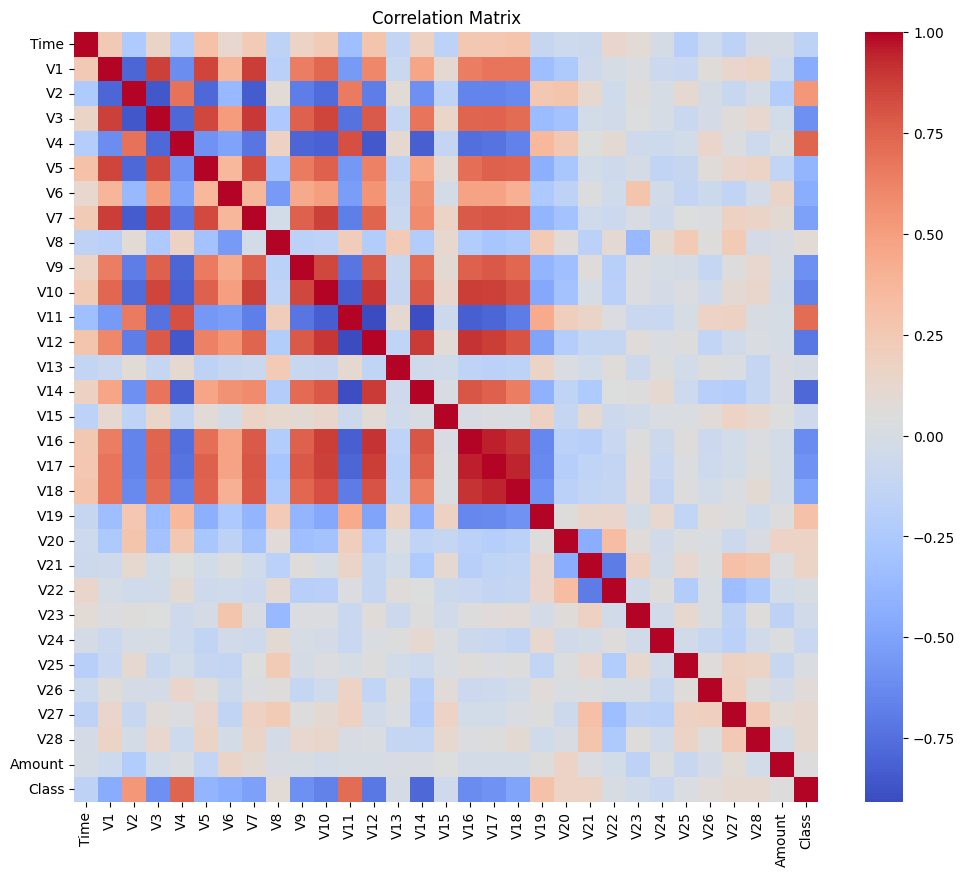

In [53]:
plt.figure(figsize=(12, 10))
sns.heatmap(smote_data.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Matrix")
plt.show()


In [54]:
smote_data['Amount_log'] = np.log1p(smote_data['Amount'])
smote_data['Time_log'] = np.log1p(smote_data['Time'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


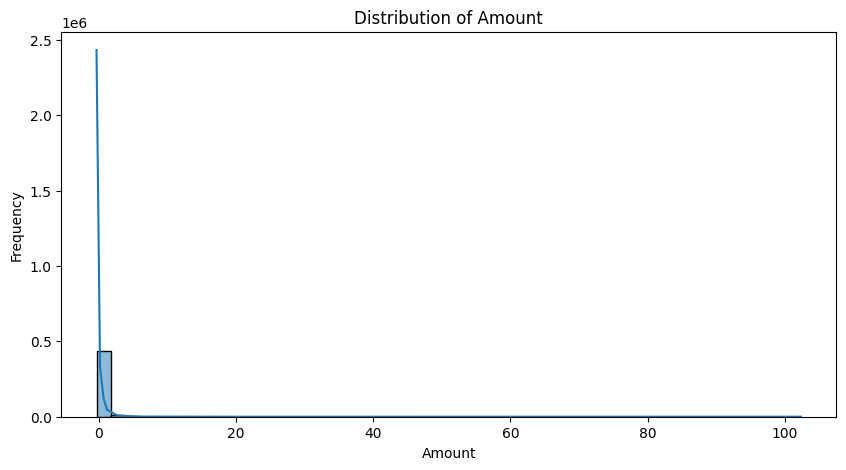

In [55]:

# Visualize the distribution of Amount
plt.figure(figsize=(10, 5))
sns.histplot(smote_data['Amount'], bins=50, kde=True)
plt.title("Distribution of Amount")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


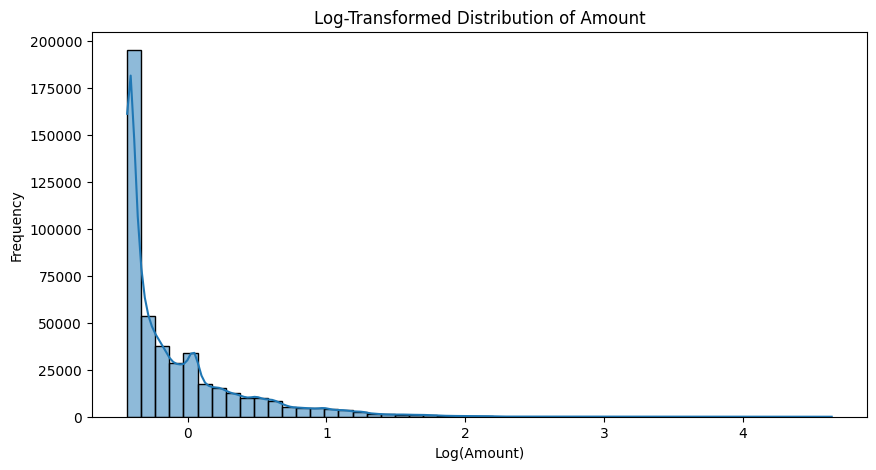

In [56]:
# Visualize the distribution of Log-transformed Amount
plt.figure(figsize=(10, 5))
sns.histplot(smote_data['Amount_log'], bins=50, kde=True)
plt.title("Log-Transformed Distribution of Amount")
plt.xlabel("Log(Amount)")
plt.ylabel("Frequency")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


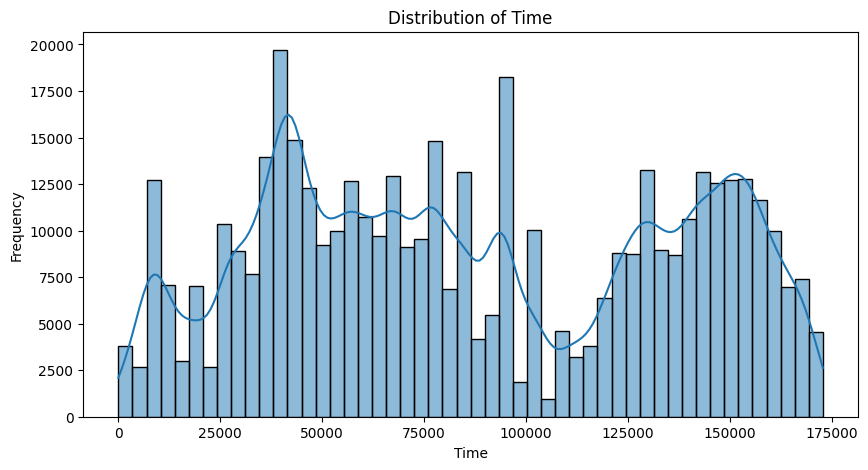

In [58]:
# Visualize the distribution of Time
plt.figure(figsize=(10, 5))
sns.histplot(smote_data['Time'], bins=50, kde=True)
plt.title("Distribution of Time")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


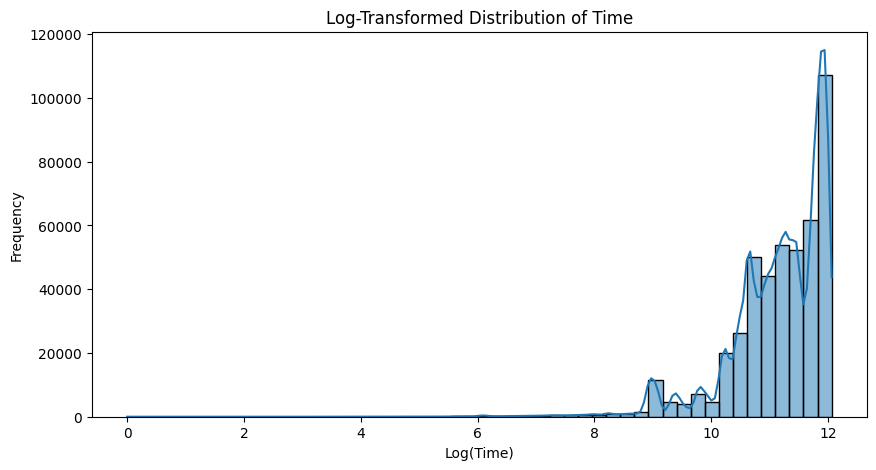

In [62]:
plt.figure(figsize=(10, 5))
sns.histplot(smote_data['Time_log'], bins=50, kde=True)
plt.title("Log-Transformed Distribution of Time")
plt.xlabel("Log(Time)")
plt.ylabel("Frequency")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

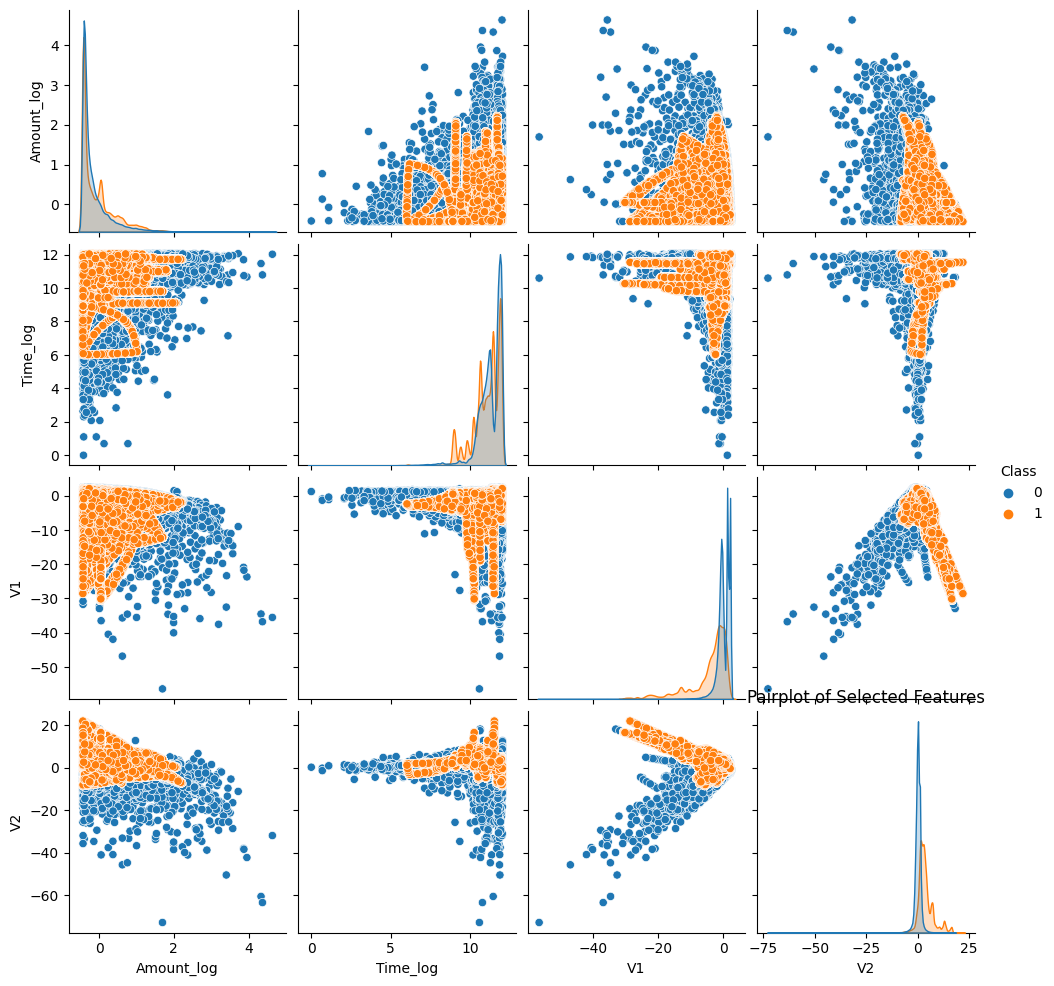

In [63]:
# Pairplot to visualize relationships between features
sns.pairplot(smote_data, hue='Class', vars=['Amount_log', 'Time_log', 'V1', 'V2'], diag_kind='kde')
plt.title("Pairplot of Selected Features")
plt.show()

In [66]:
smote_data['Transaction_Rate'] = smote_data['Amount'] / (smote_data['Time'] + 1e-5)  # Prevent division by zero


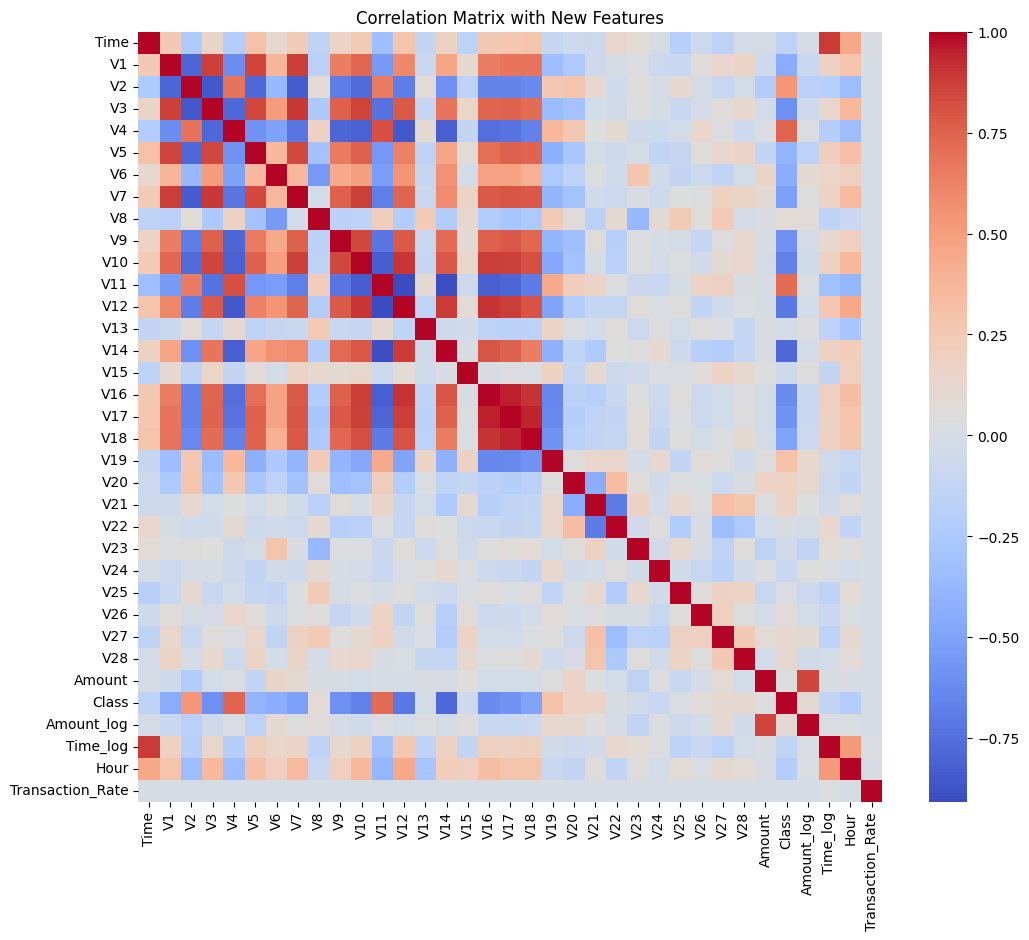

In [67]:
plt.figure(figsize=(12, 10))
sns.heatmap(smote_data.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Matrix with New Features")
plt.show()

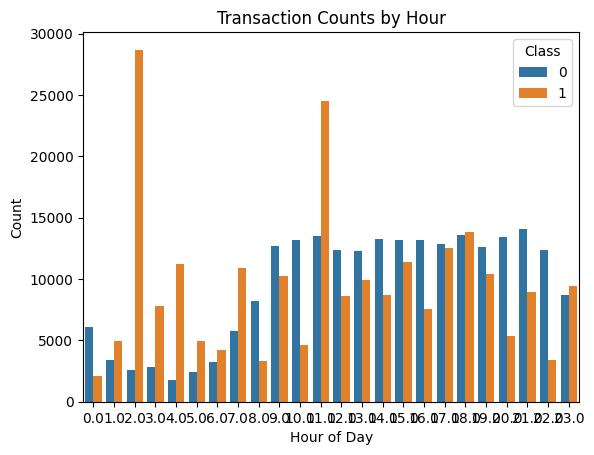

In [68]:
smote_data['Hour'] = (smote_data['Time'] // 3600) % 24
sns.countplot(x='Hour', hue='Class', data=smote_data)
plt.title("Transaction Counts by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Count")
plt.show()

 # **Restricted Boltzmann Machines (RBM)**

**Feature Representation with Restricted Boltzmann Machine(RBM)** :
Use RBMs to learn compressed representations of transactions, focusing on capturing feature dependencies and reducing noise.


In [69]:
from sklearn.neural_network import BernoulliRBM
from sklearn.preprocessing import StandardScaler

In [70]:
scaler = StandardScaler()
X_features = smote_data.drop(columns=['Class', 'Amount', 'Time'])  # Dropping original 'Amount' and 'Time' columns
X_scaled = scaler.fit_transform(X_features)


In [71]:
rbm = BernoulliRBM(n_components=20, learning_rate=0.01, n_iter=10, random_state=42)
X_rbm_features = rbm.fit_transform(X_scaled)


In [72]:

# Split the RBM features into train/test for further steps
y_balanced = smote_data['Class']
X_train_rbm, X_test_rbm, y_train_rbm, y_test_rbm = train_test_split(X_rbm_features, y_balanced, test_size=0.2, random_state=42)


In [73]:
X_train_rbm.shape

(363921, 20)

In [74]:
y_train_rbm.shape

(363921,)

In [75]:
X_test_rbm.shape

(90981, 20)

In [76]:
y_test_rbm.shape

(90981,)

# **Variational Autoencoder (VAE)**

**Anomaly Detection with Variational Autoencoder (VAE)** :
Trained a Variational Autoencoder to learn normal patterns in transactions.
The VAE’s reconstruction loss will serve as an anomaly score—higher reconstruction error indicates an anomaly.

In [260]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras import layers, Model
from tensorflow.keras.losses import MeanSquaredError


In [182]:
input_shape = (X_train_rbm.shape[1],) 
latent_dim = 10 


In [183]:
inputs = layers.Input(shape=input_shape)
x = layers.Dense(256, activation='relu')(inputs)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)  # Dropout layer for regularization
x = layers.Dense(128, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(64, activation='relu')(x)    
# Latent space
z_mean = layers.Dense(latent_dim)(x)
z_log_var = layers.Dense(latent_dim)(x)
    

In [192]:
# Sampling layer
class Sampling(layers.Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        epsilon = tf.random.normal(shape=tf.shape(z_mean))  # Sample from a normal distribution
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon


In [194]:
z = Sampling()([z_mean, z_log_var]) 

In [195]:

# Decoder
latent_inputs = layers.Input(shape=(latent_dim,))
x_dec = layers.Dense(64, activation='relu')(z)
x_dec = layers.BatchNormalization()(x_dec)
x_dec = layers.Dropout(0.2)(x_dec)
x_dec = layers.Dense(128, activation='relu')(x_dec)
x_dec = layers.BatchNormalization()(x_dec)
x_dec = layers.Dropout(0.2)(x_dec)
x_dec = layers.Dense(256, activation='relu')(x_dec)
outputs = layers.Dense(input_shape[0], activation='sigmoid')(x_dec)


In [197]:
# Build the VAE
vae = Model(inputs, outputs)


In [113]:
# VAE Model
encoder = tf.keras.Model(inputs, [z_mean, z_log_var, z])
decoder = tf.keras.Model(decoder_input, outputs)
vae_input = encoder(inputs)
vae_output = decoder(vae_input[2]) 
vae = tf.keras.Model(inputs, vae_output)


In [207]:
# Define the loss function
mse_loss = MeanSquaredError()

def vae_loss(y_true, y_pred):
    reconstruction_loss = tf.reduce_mean(mse_loss(y_true, y_pred)) * original_dim

    z_mean_val, z_log_var_val = encoder(y_true)[:2] 
    kl_loss = -0.5 * tf.reduce_mean(z_log_var_val - tf.square(z_mean_val) - tf.exp(z_log_var_val) + 1)
    return reconstruction_loss + kl_loss

In [208]:
vae.compile(optimizer='adam', loss=vae_loss)
history = vae.fit(X_train_rbm, X_train_rbm, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
9098/9098 ━━━━━━━━━━━━━━━━━━━━ 43s 3ms/step - loss: 0.0501 - val_loss: 3.5684e-04
Epoch 2/100
9098/9098 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - loss: 0.0016 - val_loss: 4.0578e-04
Epoch 3/100
9098/9098 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - loss: 5.4244e-04 - val_loss: 3.8343e-04
Epoch 4/100
9098/9098 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - loss: 4.9838e-04 - val_loss: 3.5686e-04
Epoch 5/100
9098/9098 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - loss: 6.9219e-04 - val_loss: 4.0600e-04
Epoch 8/100
9098/9098 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - loss: 8.1647e-04 - val_loss: 4.0600e-04
Epoch 9/100
9098/9098 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - loss: 7.2113e-04 - val_loss: 4.0600e-04
Epoch 10/100
9098/9098 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - loss: 6.9738e-04 - val_loss: 4.0600e-04
Epoch 11/100
9098/9098 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - loss: 0.0013 - val_loss: 4.0600e-04
Epoch 12/100
9098/9098 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - loss: 4.0171e-04 - val_loss: 4.7939e-04
Epoch 15/100
9098/9098 ━━━━━━

In [210]:
# Anomaly Detection using VAE Reconstruction Error
X_test_reconstructed = vae.predict(X_test_rbm)
mse = np.mean(np.power(X_test_rbm - X_test_reconstructed, 2), axis=1)
threshold = np.percentile(mse,95)  # Using 95th percentile as anomaly threshold
anomalies = mse > threshold


2844/2844 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


In [211]:

# Reporting Anomalies
print("Anomalies detected:", np.sum(anomalies))


Anomalies detected: 1346


In [256]:
print("Classification Report for Anomaly Detection with VAE:")
class_report = classification_report(y_test_rbm, anomalies, target_names=["Normal", "Anomaly"])
print("\nClassification Report:\n", class_report)


Classification Report for Anomaly Detection with VAE:

Classification Report:
               precision    recall  f1-score   support

      Normal       0.50      1.00      0.67     45398
     Anomaly       0.88      0.03      0.05     45583

    accuracy                           0.51     90981
   macro avg       0.69      0.51      0.36     90981
weighted avg       0.69      0.51      0.36     90981



In [262]:
conf_matrix = confusion_matrix(y_test_rbm, anomalies)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[45235   163]
 [44400  1183]]


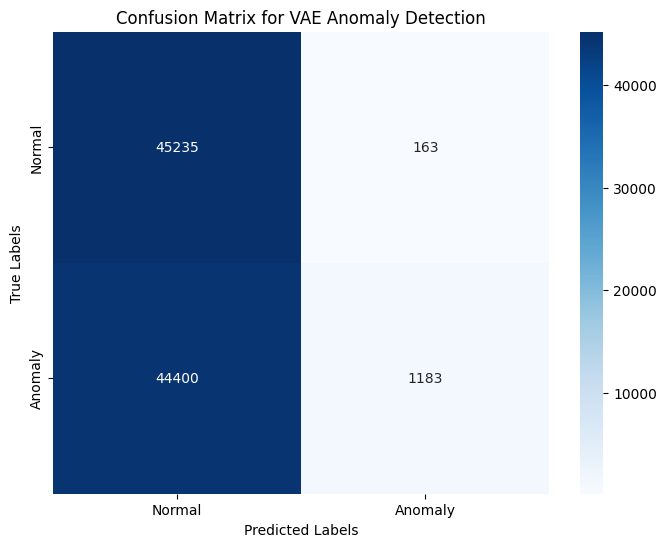

In [263]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Normal", "Anomaly"], yticklabels=["Normal", "Anomaly"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for VAE Anomaly Detection")
plt.show()

# **Generative Adversarial Network (GAN)**

**Synthetic Data Generation and Improved Detection with GANs**:
Implement a Generative Adversarial Network (GAN) to generate synthetic fraudulent transaction data.

In [223]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


In [244]:
num_epochs = 50
batch_size = 64
latent_dim = 100
learning_rate = 0.0002
beta1 = 0.5

In [226]:
# Preprocess the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(smote_data)


In [228]:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [227]:

# Create a DataLoader
data_tensor = torch.FloatTensor(data_scaled)
data_loader = torch.utils.data.DataLoader(data_tensor, batch_size=batch_size, shuffle=True)


In [230]:

# Define the Discriminator
discriminator = nn.Sequential(
    nn.Linear(data_tensor.shape[1], 64),
    nn.LeakyReLU(0.2),
    nn.Linear(64, 32),
    nn.LeakyReLU(0.2),
    nn.Linear(32, 1),
    nn.Sigmoid()
).to(device)


In [237]:

# Define the Generator
generator = nn.Sequential(
    nn.Linear(latent_dim, 32),
    nn.ReLU(),
    nn.Linear(32, 64),
    nn.ReLU(),
    nn.Linear(64, data_tensor.shape[1]),
    nn.Tanh()  # Using tanh as we scale data in range [-1,1]
).to(device)


In [238]:
criterion = nn.BCELoss()
d_optimizer = optim.Adam(discriminator.parameters(), lr=learning_rate, betas=(beta1, 0.999))
g_optimizer = optim.Adam(generator.parameters(), lr=learning_rate, betas=(beta1, 0.999))


In [245]:

for epoch in range(num_epochs):
    for i, real_data in enumerate(data_loader):
        real_data = real_data.to(device)
        batch_size = real_data.size(0)

        
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

    
        discriminator.zero_grad()
        outputs = discriminator(real_data)
        d_loss_real = criterion(outputs, real_labels)

        z = torch.randn(batch_size, latent_dim).to(device)
        fake_data = generator(z)
        outputs = discriminator(fake_data.detach())
        d_loss_fake = criterion(outputs, fake_labels)

        d_loss = d_loss_real + d_loss_fake
        d_loss.backward()
        d_optimizer.step()

        generator.zero_grad()
        outputs = discriminator(fake_data)
        g_loss = criterion(outputs, real_labels)
        g_loss.backward()
        g_optimizer.step()

    print(f"{epoch + 1} epoch completed")


1 epoch completed
2 epoch completed
3 epoch completed
4 epoch completed
5 epoch completed
6 epoch completed
7 epoch completed
8 epoch completed
9 epoch completed
10 epoch completed
11 epoch completed
12 epoch completed
13 epoch completed
14 epoch completed
15 epoch completed
16 epoch completed
17 epoch completed
18 epoch completed
19 epoch completed
20 epoch completed
21 epoch completed
22 epoch completed
24 epoch completed
25 epoch completed
26 epoch completed
27 epoch completed
28 epoch completed
29 epoch completed
30 epoch completed
31 epoch completed
32 epoch completed
33 epoch completed
34 epoch completed
35 epoch completed
36 epoch completed
37 epoch completed
38 epoch completed
39 epoch completed
40 epoch completed
41 epoch completed
42 epoch completed
43 epoch completed
44 epoch completed
45 epoch completed
46 epoch completed
47 epoch completed
48 epoch completed
49 epoch completed
50 epoch completed


In [250]:
print("GAN training complete.")


GAN training complete.


In [251]:
# Generate synthetic data
num_samples = 10 
z = torch.randn(num_samples, latent_dim).to(device)
synthetic_data = generator(z)


In [252]:
# Inverse transform to original scale 
synthetic_data_original_scale = scaler.inverse_transform(synthetic_data.detach().cpu().numpy())
print("Generated Synthetic Data:")
print(synthetic_data_original_scale)

Generated Synthetic Data:
[[ 2.90571035e+04 -1.60968742e+01  3.34554768e+00 -8.72907066e+00
  -4.95517206e+00 -1.16026125e+01 -4.64619350e+00 -1.00574074e+01
   7.30317926e+00  2.94139004e+00 -1.03408754e+00 -1.03823352e+00
  -9.43379641e-01  2.97394753e+00  4.00890303e+00 -2.32755587e-01
   5.82562065e+00  2.27245426e+00  6.44743979e-01 -2.21472406e+00
  -1.47811782e+00 -6.56365442e+00  1.80335951e+00  1.67543992e-01
   3.18818688e+00  1.71355283e+00 -2.34677577e+00 -1.93623507e+00
   1.84872341e+00 -2.08788469e-01 -8.78069550e-05 -3.05364162e-01
   1.08849211e+01  8.19096756e+00  1.16067433e+00]
 [ 1.46840094e+05 -4.79028553e-01 -2.99989891e+00 -1.79047978e+00
  -1.40397799e+00  6.13387585e-01  5.20228036e-02 -5.10589647e+00
   1.71632254e+00  1.05059147e+00  3.17585260e-01 -3.45733970e-01
   2.81596571e-01 -8.19156229e-01  8.72180760e-01 -1.17462933e+00
   2.57908845e+00 -5.48341513e-01  1.15321957e-01 -1.80839077e-01
  -2.11186782e-02  3.49201131e+00 -1.49250114e+00 -8.86567757e-02